# A NEW CHARACTERISATION OF CONVEX ORDER THROUGH THE 2-WASSERSTEIN DISTANCE

**Authors: Johannes Wiesel and Erica Zhang**

**Version: June 30, 2022**

*Columbia University*

### Introduction

We develop new computational methods for invesgating convex order using the 2-Wasserstein distance $\mathcal{W}_2$, as discussed in paper: https://arxiv.org/abs/2207.01235. In this Main File, we will plot four sample examples using each of the four sampling optimization methods in the 'Optimization' package. That is: 

 - $\textbf{Indirect Dirichlet with histograms}$: Using Dirichlet distribution to model the probability of a discretized support of an optimal measure $\mathbf{\rho}$, this method samples for $\mathbf{\rho}$ with all distributions (source distribution $\mathbf{a},\mathbf{b}$ and objective optimization measure $\mathbf{\rho}$ represented as histograms, or sample weights.
 - $\textbf{Indirect Dirichlet with samples}$: Using Dirichlet distribution to model the probability of a discretized support of an optimal measure $\mathbf{\rho}$, this method samples for $\mathbf{\rho}$ with all distributions (source distribution $\mathbf{a},\mathbf{b}$ and objective optimization measure $\mathbf{\rho}$ represented as samples. In this method, we assume uniform distribution (i.e. uniform weights) on samples.
 - $\textbf{Direct randomized Dirichlet with samples}$: Using Dirichlet method to model the optimal measure $\mathbf{\rho}$ itself, this method samples for an optimal measure $\mathbf{\rho}$ by randomly selecting a sample set for $\mathbf{\rho}$ given requested target sample size for $\mathbf{\rho}$ and dimension. In this method, all distributions (source distribution $\mathbf{a},\mathbf{b}$ and objective optimization measure $\mathbf{\rho}$ represented as samples and we assume uniform distribution (i.e. uniform weights) on samples.
 - $\textbf{Direct Dirichlet with samples:}$: Using Dirichlet method to model the optimal measure $\mathbf{\rho}$ itself, this method samples for an optimal measure $\mathbf{\rho}$ by only selecting the first $d$ generated columns as a sample set for $\mathbf{\rho}$, where $d$ is dimension. In this method, all distributions (source distribution $\mathbf{a},\mathbf{b}$ and objective optimization measure $\mathbf{\rho}$ represented as samples and we assume uniform distribution (i.e. uniform weights) on samples.
 
We compare the results obtained using each method and we also compare and analyze the runtime of each method.

### Definition

Given two source distributions $\mathbf{a}$ and $\mathbf{b}$, an optimal measure $\mathbf{\rho}$ is defined to be a probability measure with domain $[-1,1]$ in all dimensions that solves the minimization problem:

$$\min_{\mathbf{\rho}} \{ - \min_{\gamma_1} \{\langle \gamma_a, \mathbf{M_a} \rangle_{\textit{F}} \} +  \min_{\gamma_b} \{\langle \gamma_b, \mathbf{M_b} \rangle_{\textit{F}} \}\} \hspace{1cm} (1)$$

$$\textbf{s.t.} \hspace{0.2cm} \gamma_a\mathbf{1} = \mathbf{a}$$
$$\gamma_a^{\textit{T}}\mathbf{1} = \mathbf{\rho}$$
$$\gamma_b\mathbf{1} = \mathbf{b}$$
$$\gamma_b^{\textit{T}}\mathbf{1} = \mathbf{\rho}$$
$$\gamma_a,\gamma_b \geq 0$$


where:
 - $\mathbf{M_a}$ is the squared euclidean metric cost matrix from source measure $\mathbf{a}$ to measure $\mathbf{\rho}$.
 - $\mathbf{M_b}$ is the squared euclidean metric cost matrix from source measure $\mathbf{b}$ to measure $\mathbf{\rho}$.
 - $\mathbf{a},\mathbf{b},\mathbf{\rho}$ are represented as sample weights.
 
 And the "minimal Wasserstein distance" refers to the solution of the minimization problem (1). 

### Note

Since the algorithms from the "Optimization" package have on average high time-complexity, code chunks for generating lists of minimal Wasserstein distance for each example takes approximately 20 minutes. This runtime increases linearly with a higher value of parameter 'g' and exponentially (for d > 1) with a higher value of parameter 'p'. The graphs may slightly differ from those in the paper. This is because we have choose a much smaller value of 'p' and 'g' than in the paper and therefore resulting in more variance. 

### Import Dependencies 

In [1]:
# 0.1 general packages
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
import scipy as scipy 
from scipy.stats import dirichlet
from ot.datasets import make_2D_samples_gauss as gauss2
import math
from numpy import random
from scipy import stats
from itertools import product
from scipy.spatial.distance import cdist
# 0.2 runtime package
import time
# 0.3 helper packages
from Histograms import *
from Optimization import *

### Plot Examples 1.1

For $d = 1$, take two source distributions: $\mu = \mathcal{N}(0,\sigma^2)$ and $\nu = \mathcal{N}(0, 1)$ and plot variance $\sigma^2 \in [0,2]$ with respect to the minimal Wasserstein distance under optimal measure $\rho$.

Given a sampling size $n$, we plot the sample mean of the minimal Wasserstein distance obtained through each of the four optimization sampling methods described above with a filled-in 95% confidence band (y-axis) with respect to a discretized variance domain (x-axis). 

First, we generate a list of:

 - minimal Wasserstein distance under optimal measure $\rho$ obtained through "Indirect Dirichlet with histograms", "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - 95% confidence interval for "Indirect Dirichlet with histograms", "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - runtime for "Indirect Dirichlet with histograms", "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".

In [2]:
# source_a size is size_a
size_a = 100
# source_b size is size_b
size_b = 100
# target_size for rho is target_size
target_size = 100
# parition size for variance is g: partition the variance grid into 'g' equal parts
g = 5
# sampling size
n = 3
# x-axis (variance): here we start at 0.1 since variance = 0 incurs calculation problems with the 1D gaussian histogram
x = np.linspace(0.1,2,g)
# partition size of rho's support for non-dirichlet methods
p = 3
# method for choosing the dirichlet parameter alpha
method = "random"


# source_b histogram
b_result = gauss1D(size_b,0,1)
b_hist = b_result[1]
# source_b grid
b_grid = b_result[0]
# source_b samples
b_samples = np.random.normal(0, 1, size=size_b)
# source_a grid
a_grid = np.arange(size_a, dtype=np.float64)-size_a/2 

# create lists
y_hist = []
ci_lower_hist = []
ci_upper_hist = []
y_samples = []
ci_lower_samples = []
ci_upper_samples = []
y_dir = []
ci_lower_dir = []
ci_upper_dir = []
y_dir_alt = []
ci_lower_dir_alt = []
ci_upper_dir_alt = []
hist_method_time = []
samples_method_time = []
dir_method_time = []
dir_alt_time = []

for i in range(g):
    a_result = gauss1D(size_a,0,x[i])
    a = a_result[1]
    
    # 1. Histogram Method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_hist,a_grid = a_grid, b_grid = b_grid, p = p, target_size = target_size, op_method = "Hist", method = method)
    # track runtime
    runtime = time.time() - start_time
    hist_method_time.append(runtime)
    result = inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_hist.append(result)
    ci_lower_hist.append(ci_lower)
    ci_upper_hist.append(ci_upper)
    
    # 2. Samples Method
    a = np.random.normal(0, x[i], size=size_a)  # generate samples for source_a
    start_time = time.time()
    inf = sample_inference(N = n,a=a,b=b_samples, p=p, target_size = target_size, op_method = "Samples", method = method)
    # track runtime
    runtime = time.time() - start_time
    samples_method_time.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_samples.append(result)
    ci_lower_samples.append(ci_lower)
    ci_upper_samples.append(ci_upper)
    
    # 3. Dirichlet (Random Selection) Method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_samples, target_size = target_size, op_method = "Dirichlet Random", method = method)
    # track runtime
    runtime = time.time() - start_time
    dir_method_time.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir.append(result)
    ci_lower_dir.append(ci_lower)
    ci_upper_dir.append(ci_upper)
    
    # 4. Dirichlet Method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_samples, target_size = target_size, op_method = "Dirichlet", method = method)
    # track runtime
    runtime = time.time() - start_time
    dir_alt_time.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir_alt.append(result)
    ci_lower_dir_alt.append(ci_lower)
    ci_upper_dir_alt.append(ci_upper)
    
# conversion to ndarray
y_hist = np.array(y_hist)
ci_lower_hist = np.array(ci_lower_hist)
ci_upper_hist = np.array(ci_upper_hist)
y_samples = np.array(y_samples)
ci_lower_samples = np.array(ci_lower_samples)
ci_upper_samples = np.array(ci_upper_samples)
y_dir = np.array(y_dir)
ci_lower_dir = np.array(ci_lower_dir)
ci_upper_dir = np.array(ci_upper_dir)
y_dir_alt = np.array(y_dir_alt)
ci_lower_dir_alt = np.array(ci_lower_dir_alt)
ci_upper_dir_alt = np.array(ci_upper_dir_alt)
hist_method_time = np.array(hist_method_time)
samples_method_time = np.array(samples_method_time)
dir_method_time = np.array(dir_method_time)
dir_alt_time = np.array(dir_alt_time)

Now, we plot minimal Wasserstein distance under optimal measure $\rho$ obtained through each of the four optimization sampling methods (y-axis) against (discretized) variance (x-aixs).

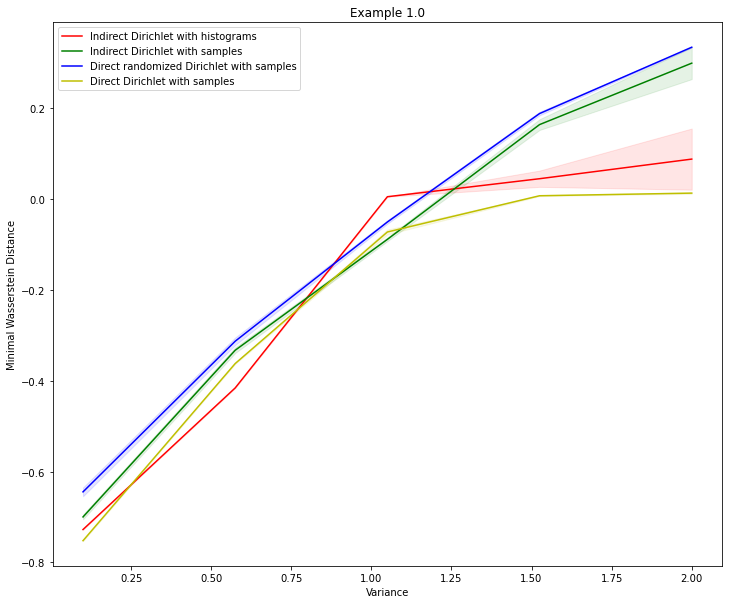

In [4]:
# Plot four curves in one graph

# Plotting the curves simultaneously
pl.plot(x, y_hist, color='r', label='Indirect Dirichlet with histograms')
# confidence band
pl.fill_between(x, ci_lower_hist, ci_upper_hist, color='r', alpha=.1)
pl.plot(x, y_samples, color='g', label='Indirect Dirichlet with samples')
# confidence band
pl.fill_between(x, ci_lower_samples, ci_upper_samples, color='g', alpha=.1)
pl.plot(x, y_dir, color='b', label='Direct randomized Dirichlet with samples')
# confidence band
pl.fill_between(x, ci_lower_dir, ci_upper_dir, color='b', alpha=.1)
pl.plot(x, y_dir_alt, color='y', label='Direct Dirichlet with samples')
# confidence band
pl.fill_between(x, ci_lower_dir_alt, ci_upper_dir_alt, color='y', alpha=.1)

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Variance")
pl.ylabel("Minimal Wasserstein Distance")
pl.title("Example 1.0")

# Adding legend
pl.legend()

# Adjust Size
pl.rcParams['figure.figsize'] = [12, 10]

# load the display window
pl.show()

### Plot Examples 1.2

For $d = 2$, take two source distributions: $\mu = \mathcal{N}(0,\sigma^2\textit{I})$ and $\nu = \mathcal{N}(0, \textit{I})$, plot variance $\sigma^2 \in [0,2]\times[0,2]$ with respect to the minimal Wasserstein distance under optimal measure $\rho$.

Given a sampling size $n$, we plot the minimal Wasserstein distance sample mean (y-axis) obtained through each of the three optimization sampling methods described above (excluding the "Histogram Method") with a filled-in 95% confidence band with respect to a discretized variance domain (x-axis). 

First, we generate a list of:

 - minimal Wasserstein distance under optimal measure $\rho$ obtained through "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - 95% confidence interval for "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - runtime for "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 

In [5]:
# source_a size is size_a
size_a = 100
# source_b size is size_b
size_b = 100
# target_size for rho is target_size
target_size = 100
# parition size for variance is g: partition the variance grid into 'g' equal parts
g = 5
# sampling size
n = 3
# x-axis (variance): here we start at 0.1 since variance = 0 incurs calculation problems with the 1D gaussian histogram
x = np.linspace(0.1,2,g)
# partition size of rho's support for non-dirichlet methods
p = 3
# method for choosing the dirichlet parameter alpha
method = "random"

# source_b samples
mu_b = np.array([0, 0])
cov_b = np.array([[1, 0], [0, 1]])
b_samples = ot.datasets.make_2D_samples_gauss(size_b, mu_b, cov_b)

# source_a mean is fixed at origin
mu_a = np.array([0, 0])

# create lists
y_samples = []
ci_lower_samples = []
ci_upper_samples = []
y_dir = []
ci_lower_dir = []
ci_upper_dir = []
y_dir_alt = []
ci_lower_dir_alt = []
ci_upper_dir_alt = []
samples_method_time_2 = []
dir_method_time_2 = []
dir_alt_time_2 = []


for i in range(g):
    
    # generate samples for source_a distribution
    cov_a = np.array([[x[i], 0], [0, x[i]]])
    a = ot.datasets.make_2D_samples_gauss(size_a, mu_a, cov_a)    

    # 1. Generate graph for Sample method
    start_time = time.time()
    inf = sample_inference(N = n,a=a,b=b_samples, p=p, target_size = target_size, op_method = "Samples", method = method)
    runtime = time.time() - start_time
    samples_method_time_2.append(runtime)
    #runtime
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_samples.append(result)
    ci_lower_samples.append(ci_lower)
    ci_upper_samples.append(ci_upper)

    # 2. Generate graph for Dirichlet (random selection) method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_samples, target_size = target_size, op_method = "Dirichlet Random", method = method)
    runtime = time.time() - start_time
    #runtime
    dir_method_time_2.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir.append(result)
    ci_lower_dir.append(ci_lower)
    ci_upper_dir.append(ci_upper)


    # 3. Generate graph for Dirichlet (alternative) method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_samples, target_size = target_size, op_method = "Dirichlet", method = method)
    runtime = time.time() - start_time
    #runtime
    dir_alt_time_2.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir_alt.append(result)
    ci_lower_dir_alt.append(ci_lower)
    ci_upper_dir_alt.append(ci_upper)


    
y_samples = np.array(y_samples)
ci_lower_samples = np.array(ci_lower_samples)
ci_upper_samples = np.array(ci_upper_samples)
y_dir = np.array(y_dir)
ci_lower_dir = np.array(ci_lower_dir)
ci_upper_dir = np.array(ci_upper_dir)
y_dir_alt = np.array(y_dir_alt)
ci_lower_dir_alt = np.array(ci_lower_dir_alt)
ci_upper_dir_alt = np.array(ci_upper_dir_alt)
samples_method_time_2 = np.array(samples_method_time_2)
dir_method_time_2 = np.array(dir_method_time_2)
dir_alt_time_2 = np.array(dir_alt_time_2)


Now, we plot optimal measure $\rho$ obtained through each of the three optimization sampling methods (y-axis) against (discretized) variance (x-aixs).

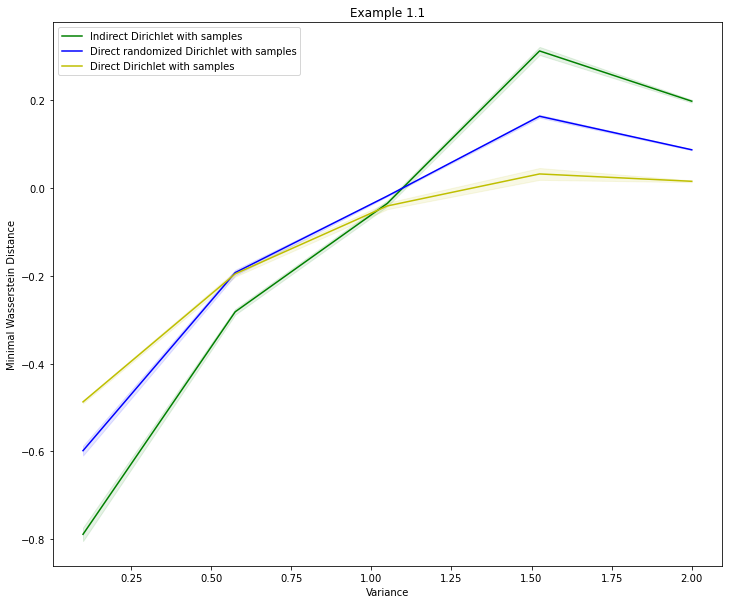

In [6]:
# Plot three curves in one graph

# Plotting the curves simultaneously
pl.plot(x, y_samples, color='g', label='Indirect Dirichlet with samples')
# confidence band
pl.fill_between(x, ci_lower_samples, ci_upper_samples, color='g', alpha=.1)
pl.plot(x, y_dir, color='b', label='Direct randomized Dirichlet with samples')
# confidence band
pl.fill_between(x, ci_lower_dir, ci_upper_dir, color='b', alpha=.1)
pl.plot(x, y_dir_alt, color='y', label='Direct Dirichlet with samples')
# confidence band
pl.fill_between(x, ci_lower_dir_alt, ci_upper_dir_alt, color='y', alpha=.1)

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Variance")
pl.ylabel("Minimal Wasserstein Distance")
pl.title("Example 1.1")

# Adding legend
pl.legend()

# To load the display window
pl.show()

### Plot Examples 2.1

For $d = 1$, take two source distributions: $\mu = \frac{1}{2}(\delta_{-1-s}+\delta_{1+s})$ and $\nu = \frac{1}{2}(\delta_{-1}+\delta_{1})$, plot $s \in [-1,1]$ with respect to the minimal Wasserstein distance under optimal measure $\rho$.

Given a sampling size $n$, we plot the minimal Wasserstein distance sample mean obtained through each of the four optimization sampling methods described above with a filled-in 95% confidence band (y-axis) with respect to a discretized variance domain (x-axis). 

First, we generate a list of:

 - minimal Wasserstein distance under optimal measure $\rho$ obtained through "Indirect Dirichlet with histograms", "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - 95% confidence interval for "Indirect Dirichlet with histograms", "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - runtime for "Indirect Dirichlet with histograms", "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".

In [7]:
# source_a size is size_a
size_a = 100
# source_b size is size_b
size_b = 100
# target_size for rho is target_size
target_size = 100
# parition size for variance is g: partition the variance grid into 'g' equal parts
g = 5
# sampling size
n = 3
# x-axis (variance): here we start at 0.1 since variance = 0 incurs calculation problems with the 1D gaussian histogram
x = np.linspace(0.1,2,g)
# partition size of rho's support for non-dirichlet methods
p = 3
# method for choosing the dirichlet parameter alpha
method = "random"

# source_b histogram and grid
result_b = combined_dirac(x = [-1,1], n = size_b)
b_grid = result_b[0]
b_hist = result_b[1]
# source_b samples
b_samples = random.choice([-1,1],size_b)

# create lists
y_hist = []
ci_lower_hist = []
ci_upper_hist = []
y_samples = []
ci_lower_samples = []
ci_upper_samples = []
y_dir = []
ci_lower_dir = []
ci_upper_dir = []
y_dir_alt = []
ci_lower_dir_alt = []
ci_upper_dir_alt = []
hist_method_time_3 = []
samples_method_time_3 = []
dir_method_time_3 = []
dir_alt_time_3 = []


for i in range(g):
    result_a = combined_dirac(x = [-1-x[i],1+x[i]], n = size_a)
    a_grid = result_a[0]
    a = result_a[1]
    
    # 1. Histogram Method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_hist,a_grid = a_grid, b_grid = b_grid, p=p, target_size = target_size, op_method = "Hist", method = method)
    runtime = time.time() - start_time
    # track runtime
    hist_method_time_3.append(runtime)
    result = inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_hist.append(result)
    ci_lower_hist.append(ci_lower)
    ci_upper_hist.append(ci_upper)

    # 2. Generate graph for Sample method
    a = random.choice([-1-x[i],1+x[i]],size_a) # generate samples for source_a
    start_time = time.time()
    inf = sample_inference(N = n,a=a,b=b_samples, p=p, target_size = target_size, op_method = "Samples", method = method)
    runtime = time.time() - start_time
    # track runtime
    samples_method_time_3.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_samples.append(result)
    ci_lower_samples.append(ci_lower)
    ci_upper_samples.append(ci_upper)


    # 3. Generate graph for Dirichlet (random selection) method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_samples, target_size = target_size, op_method = "Dirichlet Random", method = method)
    runtime = time.time() - start_time
    # track runtime
    dir_method_time_3.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir.append(result)
    ci_lower_dir.append(ci_lower)
    ci_upper_dir.append(ci_upper)


    # 4. Generate graph for Dirichlet (alternative) method
    start_time = time.time()
    inf = sample_inference(N = n, a=a,b=b_samples, target_size = target_size, op_method = "Dirichlet", method = method)
    runtime = time.time() - start_time
    # track runtime
    dir_alt_time_3.append(runtime)
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir_alt.append(result)
    ci_lower_dir_alt.append(ci_lower)
    ci_upper_dir_alt.append(ci_upper)


y_hist = np.array(y_hist)
ci_lower_hist = np.array(ci_lower_hist)
ci_upper_hist = np.array(ci_upper_hist)
y_samples = np.array(y_samples)
ci_lower_samples = np.array(ci_lower_samples)
ci_upper_samples = np.array(ci_upper_samples)
y_dir = np.array(y_dir)
ci_lower_dir = np.array(ci_lower_dir)
ci_upper_dir = np.array(ci_upper_dir)
y_dir_alt = np.array(y_dir_alt)
ci_lower_dir_alt = np.array(ci_lower_dir_alt)
ci_upper_dir_alt = np.array(ci_upper_dir_alt)
hist_method_time_3 = np.array(hist_method_time)
samples_method_time_3 = np.array(samples_method_time)
dir_method_time_3 = np.array(dir_method_time)
dir_alt_time_3 = np.array(dir_alt_time)

Now, we plot minimal Wasserstein distance under optimal measure $\rho$ obtained through each of the four optimization sampling methods (y-axis) against (discretized) variance (x-aixs).

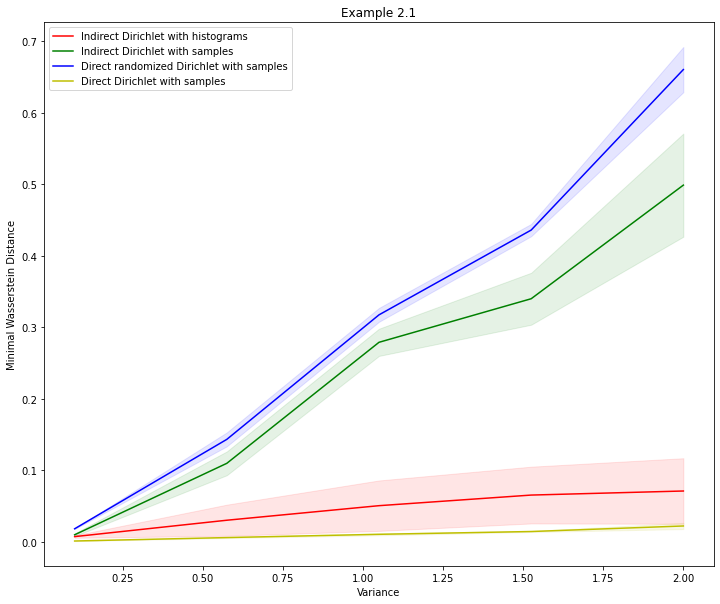

In [8]:
# Plot four curves in one graph

pl.plot(x, y_hist, color='r', label='Indirect Dirichlet with histograms')
# confidence band
pl.fill_between(x, ci_lower_hist, ci_upper_hist, color='r', alpha=.1)
pl.plot(x, y_samples, color='g', label='Indirect Dirichlet with samples')
# confidence band
pl.fill_between(x, ci_lower_samples, ci_upper_samples, color='g', alpha=.1)
pl.plot(x, y_dir, color='b', label='Direct randomized Dirichlet with samples')
# confidence band
pl.fill_between(x, ci_lower_dir, ci_upper_dir, color='b', alpha=.1)
pl.plot(x, y_dir_alt, color='y', label='Direct Dirichlet with samples')
# confidence band
pl.fill_between(x, ci_lower_dir_alt, ci_upper_dir_alt, color='y', alpha=.1)

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Variance")
pl.ylabel("Minimal Wasserstein Distance")
pl.title("Example 2.1")

# Adding legend
pl.legend()

# To load the display window
pl.show()

### Plot Examples 2.2

For $d = 2$, take two source distributions: $$\mu = \frac{1}{4}(\delta_{(-1-s,0)}+\delta_{(1+s,0)})$$ and $$\nu = \frac{1}{4}(\delta_{(-1,0)}+\delta_{(1,0)}+\delta_{(0,1)}+\delta_{(0,-1)})$$ 

plot $s \in [-1,1] \times [-1,1]$ with respect to the minimal Wasserstein distance under optimal measure $\rho$.

Given a sampling size $n$, we plot the minimal Wasserstein distance sample mean obtained through each of the three optimization sampling methods described above (excluding the "Histogram Method") with a filled-in 95% confidence band (y-axis) with respect to a discretized variance domain (x-axis). 

First, we generate a list of:

 - minimal Wasserstein distance under optimal measure $\rho$ obtained through "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - 95% confidence interval for "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".
 - runtime for "Indirect Dirichlet with samples", "Direct randomized Dirichlet with samples", "Direct Dirichlet with samples".

In [10]:
# source_a size is size_a
size_a = 100
# source_b size is size_b
size_b = 100
# target_size for rho is target_size
target_size = 100
# parition size for variance is g: partition the variance grid into 'g' equal parts
g = 5
# sampling size
n = 3
# x-axis (variance): here we start at 0.1 since variance = 0 incurs calculation problems with the 1D gaussian histogram
x = np.linspace(0.1,2,g)
# partition size of rho's support for non-dirichlet methods
p = 3
# method for choosing the dirichlet parameter alpha
method = "random"


# source_b support
b_ls = np.array([[-1,0],[1,0],[0,1],[0,-1]])
# uniform distribution on all coordinates listed in b_ls
generate_indx = random.choice([0,1,2,3],size_b)
# samples
b = b_ls[generate_indx]

# create lists
y_samples = []
ci_lower_samples = []
ci_upper_samples = []
y_dir = []
ci_lower_dir = []
ci_upper_dir = []
y_dir_alt = []
ci_lower_dir_alt = []
ci_upper_dir_alt = []
samples_method_time_4 = []
dir_method_time_4 = []
dir_alt_time_4 = []

for i in range(g):
    # source_a support
    a_ls = np.array([[-1-x[i],0],[1+x[i],0],[0,1+x[i]],[0,-1-x[i]]])
    # uniform distribution on all coordinates listed in b_ls
    generate_indx = random.choice([0,1,2,3],size_a)
    # samples
    a = a_ls[generate_indx]
    
    # 1. Samples Method
    start_time = time.time()
    inf = sample_inference(N = n,a=a,b=b,p=p,target_size = target_size, op_method = "Samples", method = method)
    runtime = time.time() - start_time
    samples_method_time_4.append(runtime)
        
    #print(inf)
    
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_samples.append(result)
    ci_lower_samples.append(ci_lower)
    ci_upper_samples.append(ci_upper)
    
    # 2. Dirichlet (Random Sampling) Method
    start_time = time.time()
    inf = sample_inference(N = n,a=a,b=b,target_size = target_size, op_method = "Dirichlet Random", method = method)
    runtime = time.time() - start_time
    dir_method_time_4.append(runtime)
        
    #print(inf)
    
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir.append(result)
    ci_lower_dir.append(ci_lower)
    ci_upper_dir.append(ci_upper)
    
    # 3. Dirichlet Method
    start_time = time.time()
    inf = sample_inference(N = n,a=a,b=b,target_size = target_size, op_method = "Dirichlet", method = method)
    runtime = time.time() - start_time
    dir_alt_time_4.append(runtime)
        
    #print(inf)
    
    result =  inf[0]
    ci_lower = inf[2][0]
    ci_upper = inf[2][1]
    y_dir_alt.append(result)
    ci_lower_dir_alt.append(ci_lower)
    ci_upper_dir_alt.append(ci_upper)



y_samples = np.array(y_samples)
ci_lower_samples = np.array(ci_lower_samples)
ci_upper_samples = np.array(ci_upper_samples)
y_dir = np.array(y_dir)
ci_lower_dir = np.array(ci_lower_dir)
ci_upper_dir = np.array(ci_upper_dir)
y_dir_alt = np.array(y_dir_alt)
ci_lower_dir_alt = np.array(ci_lower_dir_alt)
ci_upper_dir_alt = np.array(ci_upper_dir_alt)
samples_method_time_4 = np.array(samples_method_time)
dir_method_time_4 = np.array(dir_method_time)
dir_alt_time_4 = np.array(dir_alt_time)

Now, we plot: minimal Wasserstein distance under optimal measure $\rho$ obtained through each of the three optimization sampling methods (y-axis) against (discretized) variance (x-aixs).

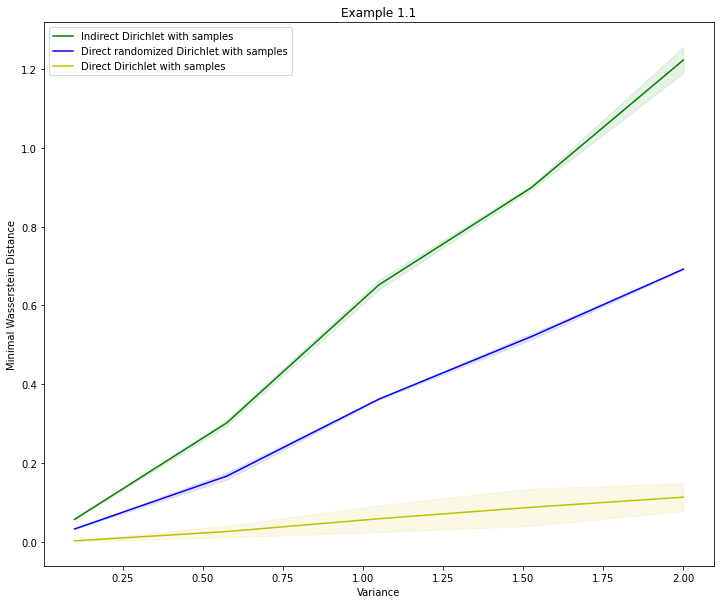

In [11]:
# Plot three curves in one graph

# Plotting the curves simultaneously
pl.plot(x, y_samples, color='g', label='Indirect Dirichlet with samples')
# confidence band
pl.fill_between(x, ci_lower_samples, ci_upper_samples, color='g', alpha=.1)
pl.plot(x, y_dir, color='b', label='Direct randomized Dirichlet with samples')
# confidence band
pl.fill_between(x, ci_lower_dir, ci_upper_dir, color='b', alpha=.1)
pl.plot(x, y_dir_alt, color='y', label='Direct Dirichlet with samples')
# confidence band
pl.fill_between(x, ci_lower_dir_alt, ci_upper_dir_alt, color='y', alpha=.1)

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Variance")
pl.ylabel("Minimal Wasserstein Distance")
pl.title("Example 1.1")

# Adding legend
pl.legend()

# To load the display window
pl.show()

### Runtime Comparison

We will now compare the average runtime for each of the optimization methods with repect to each of the examples.

In [12]:
# Example 1.1
ex1_mr_hist = hist_method_time.mean()
ex1_var_hist = hist_method_time.var()
ex1_mr_samples = samples_method_time.mean()
ex1_var_samples = samples_method_time.var()
ex1_mr_dir = dir_method_time.mean()
ex1_var_dir = dir_method_time.var()
ex1_mr_dir_alt = dir_alt_time.mean()
ex1_var_dir_alt = dir_alt_time.var()

# Example 1.2
ex2_mr_samples = samples_method_time_2.mean()
ex2_var_samples = samples_method_time_2.var()
ex2_mr_dir = dir_method_time_2.mean()
ex2_var_dir = dir_method_time_2.var()
ex2_mr_dir_alt = dir_alt_time_2.mean()
ex2_var_dir_alt = dir_alt_time_2.var()

# Example 2.1
ex3_mr_hist = hist_method_time_3.mean()
ex3_var_hist = hist_method_time_3.var()
ex3_mr_samples = samples_method_time_3.mean()
ex3_var_samples = samples_method_time_3.var()
ex3_mr_dir = dir_method_time_3.mean()
ex3_var_dir = dir_method_time_3.var()
ex3_mr_dir_alt = dir_alt_time_3.mean()
ex3_var_dir_alt = dir_alt_time_3.var()

# Example 1.4
ex4_mr_samples = samples_method_time_4.mean()
ex4_var_samples = samples_method_time_4.var()
ex4_mr_dir = dir_method_time_4.mean()
ex4_var_dir = dir_method_time_4.var()
ex4_mr_dir_alt = dir_alt_time_4.mean()
ex4_var_dir_alt = dir_alt_time_4.var()


In [14]:
# print results

print("For Ex 1.1, the respective average runtime for each method in the order of 'hist', 'samples', 'dirichlet', and 'dirichlet_alt' is: ", ex1_mr_hist, ",", ex1_mr_samples, ",", ex1_mr_dir,",", ex1_mr_dir_alt)
print("The respective variance is ", ex1_var_hist, ",", ex1_var_samples, ",", ex1_var_dir",", ex1_var_dir_alt)
print("\n")
print("For Ex 1.2, the respective average runtime for each method in the order of 'samples', 'dirichlet', and 'dirichlet_alt' is: ", ex2_mr_samples, ",", ex2_mr_dir,",", ex2_mr_dir_alt)
print("The respective variance is ", ex2_var_samples, ",", ex2_var_dir",", ex2_var_dir_alt)
print("\n")
print("For Ex 2.1, the respective average runtime for each method in the order of 'hist', 'samples', 'dirichlet', and 'dirichlet_alt' is: ", ex3_mr_hist, ",", ex3_mr_samples, ",", ex3_mr_dir,",", ex3_mr_dir_alt)
print("The respective variance is ", ex3_var_hist, ",", ex3_var_samples, ",", ex3_var_dir",", ex3_var_dir_alt)
print("\n")
print("For Ex 2.1, the respective average runtime for each method in the order of 'samples', 'dirichlet', and 'dirichlet_alt' is: ", ex4_mr_samples, ",", ex4_mr_dir,",", ex4_mr_dir_alt)
print("The respective variance is ", ex4_var_samples, ",", ex4_var_dir",", ex4_var_dir_alt)

SyntaxError: invalid syntax (2971618194.py, line 4)

In [ ]:
# plot average runtime 

X = np.arange(4) # corresponds to each example 1.1 - 2.1

# create mean runtime list
hist_method_time = [ex1_mr_hist,0,ex3_mr_hist,0] # fill empty space with 0
samples_method_time = [ex1_mr_samples,ex2_mr_samples,ex3_mr_samples,ex4_mr_samples]
dir_method_time = [ex1_mr_dir,ex2_mr_dir,ex3_mr_dir,ex4_mr_dir]
dir_alt_time = [ex1_mr_dir_alt,ex2_mr_dir_alt,ex3_mr_dir_alt,ex4_mr_dir_alt] 

# Plotting the curves simultaneously
pl.plot(X, hist_method_time, color='r', label='Indirect Dirichlet with histograms')
pl.plot(X, samples_method_time, color='b', label='Indirect Dirichlet with samples')
pl.plot(X, dir_method_time, color='g', label='Direct randomized Dirichlet with samples')
pl.plot(X, dir_alt_time, color='y', label='Direct Dirichlet with samples')

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Examples")
pl.ylabel("Runtime")
pl.title("Average Runtime for Ex.1.1-21")

# Adding legend
pl.legend()

# To load the display window
pl.show()

In [ ]:
# plot variance 

# create variance list
hist_method_var = [ex1_var_hist,0,ex3_var_hist,0] # fill empty space with 0
samples_method_var = [ex1_var_samples,ex2_var_samples,ex3_var_samples,ex4_var_samples]
dir_method_var = [ex1_var_dir,ex2_var_dir,ex3_var_dir,ex4_var_dir]
dir_alt_var = [ex1_var_dir_alt,ex2_var_dir_alt,ex3_var_dir_alt,ex4_var_dir_alt]

# Plotting the curves simultaneously
pl.plot(X, hist_method_var, color='r', label='Indirect Dirichlet with histograms')
pl.plot(X, samples_method_var, color='b', label='Indirect Dirichlet with samples')
pl.plot(X, dir_method_var, color='g', label='Direct randomized Dirichlet with samples')
pl.plot(X, dir_alt_var, color='y', label='Direct Dirichlet with samples')

# Naming the x-axis, y-axis and the whole graph
pl.xlabel("Examples")
pl.ylabel("Runtime Variance")
pl.title("Runtime Variance for Ex.1.1-21")

# Adding legend
pl.legend()

# To load the display window
pl.show()

### Conclusion

As we have predicted, discounting the numerical errors, all estimators seem to detect convex order as all methods returned a postive sloped straight line when plotting variance (x-axis) against the minimal Wasserstein distance under optimal measure $\mathbf{\rho}$. It is noteworthy that the 'Indirect Dirichlet with histograms' method yields consistently a higher minimal Wasserstein distance for every discretized variance than all other methods across all 1D examples plotted. This makes sense because the 'Indirect Dirichlet with histograms' method does not assume uniform distribution on samples. With instead sample weights passed in as input parameter, this method has smaller variance in calculating the Wasserstein distance, thereby obtaining consistenly a larger minimal value. 

As for runtime, the 'Indirect Dirichlet with histograms' method consistently yields the lowest value, while the other three methods yield a much higher runtime. This is because of the extra complexity involved in calculating the cost matrix for every probability measure $\mathbf{\rho}$ we sampled for in these methods. It is noticeable that the 'Indirect Dirichlet with histograms' method seems to outpeform the other two, i.e. "dirichlet random" method and "dirichlet" method by obtaining on average a lower cost in runtime. It is worthy to note that the "Direct Dirichlet with samples" does not exploit the $\mathcal{P}^2_1(\mathbb{R})^d$-space well when $\mu \leq_c \nu$. It appears that the "Direct randomized Dirichlet with samples" method does a better job in capturing the convex order. 
